In [6]:
import os
from pathlib import Path
import modneat
from modneat import visualize

local_dir = os.path.join(str(Path().resolve()))
out_dir = str(os.path.join(local_dir, 'out'))

In [7]:
# 設定ファイルを読み込み
config_path = os.path.join(local_dir, 'default_genome.ini')
config = modneat.Config(modneat.DefaultGenome, modneat.DefaultReproduction,
                     modneat.DefaultSpeciesSet, modneat.DefaultStagnation, 
                     config_path)

#初期個体群を生成、一つの個体を取得など
p = modneat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(modneat.StdOutReporter(True))
stats = modneat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(modneat.Checkpointer(5, filename_prefix='out/neat-checkpoint-'))

In [8]:
g1 = p.population[1]

In [10]:
net= modneat.nn.RecurrentNetwork.create(g1,config)

In [11]:
net.node_evals

[(1,
  <function modneat.activations.sigmoid_activation(z)>,
  <function modneat.aggregations.sum_aggregation(x)>,
  -2.054846023796312,
  1.0,
  [(-1, 0.17985336769485696),
   (-2, 0.19404060253689825),
   (1, 0.11643295972317588)]),
 (2,
  <function modneat.activations.sigmoid_activation(z)>,
  <function modneat.aggregations.sum_aggregation(x)>,
  0.9572571800396765,
  1.0,
  [(-1, 0.9282862419999796),
   (-2, 1.1324649262824036),
   (2, -0.4190236072881665)]),
 (0,
  <function modneat.activations.sigmoid_activation(z)>,
  <function modneat.aggregations.sum_aggregation(x)>,
  -0.3037168321424998,
  1.0,
  [(1, 0.15796339249455366),
   (2, -0.5212461108602838),
   (-1, 0.5369546338561608),
   (-2, 0.27719110057389956),
   (0, 0.7068818462073466)])]

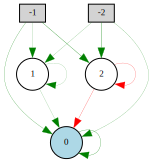

In [15]:
modneat.visualize.draw_net(config, g1)

In [13]:
import modneat.nn.utils as utils

In [14]:
utils.weight_change(net, -1, 0, 100)

In [16]:
net.node_evals

[(1,
  <function modneat.activations.sigmoid_activation(z)>,
  <function modneat.aggregations.sum_aggregation(x)>,
  -2.054846023796312,
  1.0,
  [(-1, 0.17985336769485696),
   (-2, 0.19404060253689825),
   (1, 0.11643295972317588)]),
 (2,
  <function modneat.activations.sigmoid_activation(z)>,
  <function modneat.aggregations.sum_aggregation(x)>,
  0.9572571800396765,
  1.0,
  [(-1, 0.9282862419999796),
   (-2, 1.1324649262824036),
   (2, -0.4190236072881665)]),
 (0,
  <function modneat.activations.sigmoid_activation(z)>,
  <function modneat.aggregations.sum_aggregation(x)>,
  -0.3037168321424998,
  1.0,
  [(1, 0.15796339249455366),
   (2, -0.5212461108602838),
   (-1, 100.53695463385615),
   (-2, 0.27719110057389956),
   (0, 0.7068818462073466)])]